In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import shutil
import sys
import time
import pprint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

# print(tf.__version__)
# print(sys.version_info)
# for module in mpl, np, pd, sklearn, tf, keras:
#     print(module.__name__, module.__version__) 

In [2]:
#数据
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)


# x = (x-u)/std（归一化）
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32))
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32))
x_test_scaled = scaler.transform(
    x_test.astype(np.float32))

In [4]:
#metric 的使用

metric = keras.metrics.MeanSquaredError()
print(metric([5.0],[2.0]))
print(metric([0.0],[1.0]))
print(metric.result())
metric.reset_states()
metric([1.],[3.])
print(metric.result())

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(4.0, shape=(), dtype=float32)


In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',
                      input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

#1.遍历训练集 metric
#  1.1自动求导
#2.epoch结束 验证集 metric

epochs = 100
batch_size = 32
steps_per_epoch = len(x_train_scaled) // batch_size
optimizer = keras.optimizers.SGD()
metric = keras.metrics.MeanSquaredError()
def random_batch(x,y,batch_size32):
    idx = np.random.randint(0,len(x),size=batch_size)
    return x[idx],y[idx]

for epoch in range(epochs):
    metric.reset_states()
    for step in range(steps_per_epoch):
        x_batch, y_batch = random_batch(x_train_scaled,y_train_scaled,batch_size)
        with tf.GradientTape() as tape:
            
            y_pred = model(x_batch)
            loss = tf.reduce_mean(
                keras.losses.mean_absolute_error(y_batch,y_pred))
            metric(y_batch,y_pred)
        grads = tape.gradient(loss,model.variables)
        grads_and_vars = zip(grads, model.variables)
        optimizer.apply_grdients(grads_and_vars)
        print("\rEpoch",epoch, " train mse:",
             metric.result().numpy(), end="")
    y_valid_pred = model(x_valid_scaled)
    valid_loss = tf.reduce_mean(keras.losses.mean_squared_error(y_valid_pred,y_valid))
    print("\t","valid mse: ", valid_loss.numpy())
    



history = model.fit(x_train_scaled,y_train,
                    validation_data=(x_valid_scaled,y_valid),
                   epochs=100,
                   callbacks = callbacks)

NameError: name 'y_train_scaled' is not defined

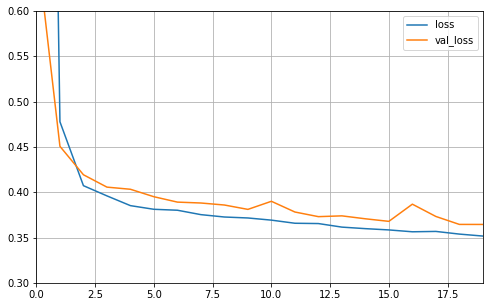

In [5]:
 def plot_learning_curves(his):
        pd.DataFrame(his.history).plot(figsize=(8,5))
        plt.grid(True)
        plt.gca().set_ylim(0.3,0.6)
        plt.show()
        
plot_learning_curves(history)

In [6]:
model.evaluate(x_test_scaled,y_test)

5160/5160 [==============================] - 0s 19us/sample - loss: 0.3691


0.3690879697947539